# Lab | Cleaning numerical data
***
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

## Context
***
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:
***
Retain customers, Analyze relevant customer data, Develop focused customer retention programs. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
***
#### Remember the process:

- **Case Study**
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting

## Instructions
***
#### 1. Import the necessary libraries.

In [109]:
import pandas as pd
import numpy as np
import snakecase
import stringcase
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

***
#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [110]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

***
#### 3. First look at its main features (head, shape, info).

In [129]:
customer_df.head()

In [130]:
customer_df.shape

In [131]:
customer_df.dtypes

***
#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [114]:
customer_df.columns = customer_df.columns.str.replace(' ', '_').map(stringcase.snakecase)

***
#### 5. Change effective to date column to datetime format.

In [115]:
customer_df['effective__to__date'] = pd.to_datetime(customer_df['effective__to__date'],errors='coerce')

***
#### 6. Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [132]:
numerical_df =customer_df._get_numeric_data()
numerical_df

***
#### 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [117]:
def differentiate_variables(df):
    continuous_cols = []
    discrete_cols = []

    for col in numerical_df.columns:
        if numerical_df[col].nunique() <= 20:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df
continuous_df, discrete_df = differentiate_variables(numerical_df)

***
#### 8. Plot a correlation matrix, comment what you see.

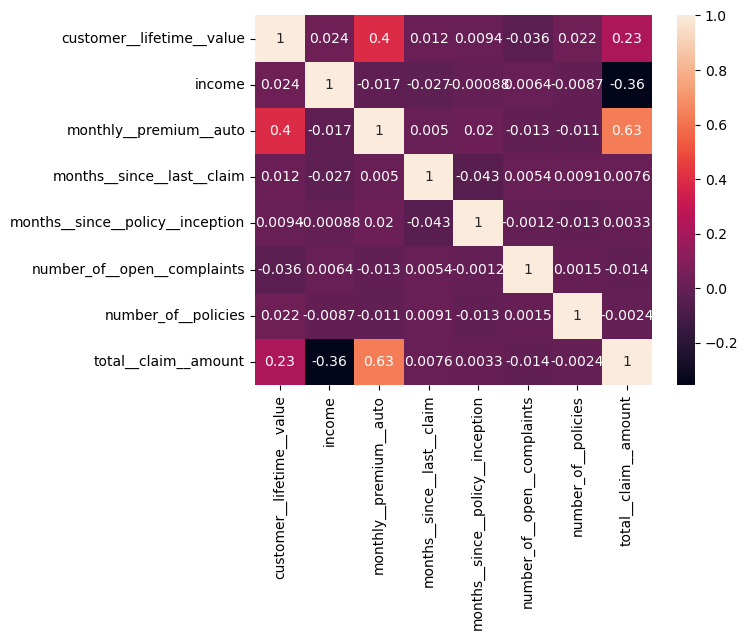

In [135]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

>I can see that the highest correlation between columns is monthly premium auto with total_claim amount.
I can also see a relatively high correlation between costumer lifetime value and total claim amount, and a negative correlation between income and total claim amount

***
#### 9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

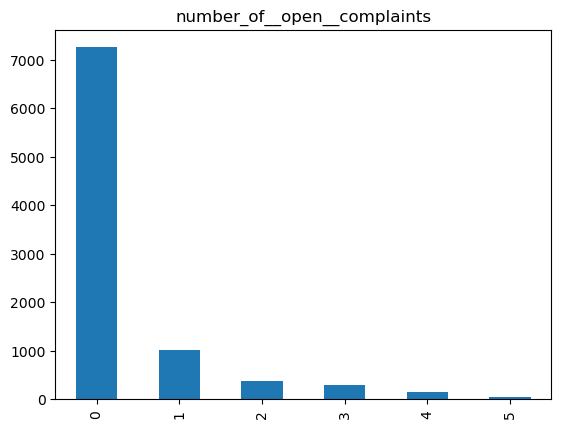

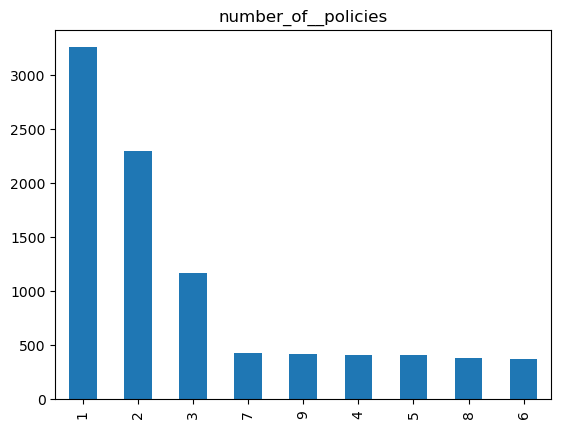

In [119]:
def plot_discrete_variables(df):
    for var in discrete_df:
        plt.figure()
        discrete_df[var].value_counts().plot(kind='bar')
        plt.title(var)
        plt.show()
plot_discrete_variables(discrete_df)

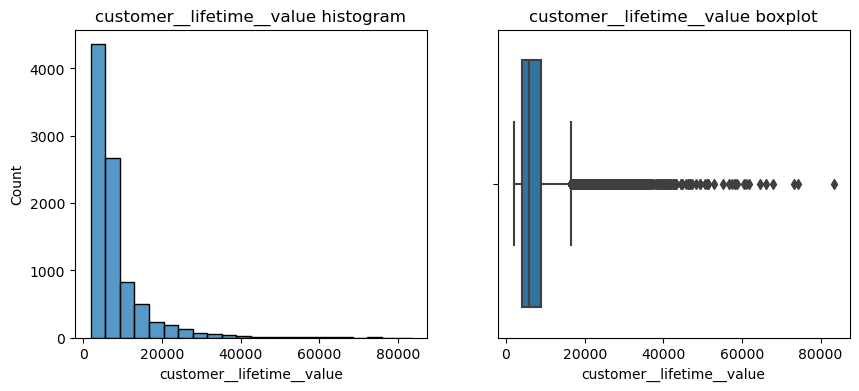

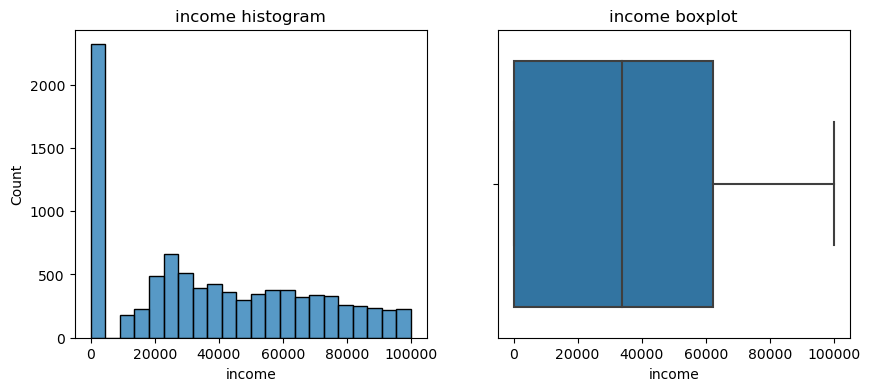

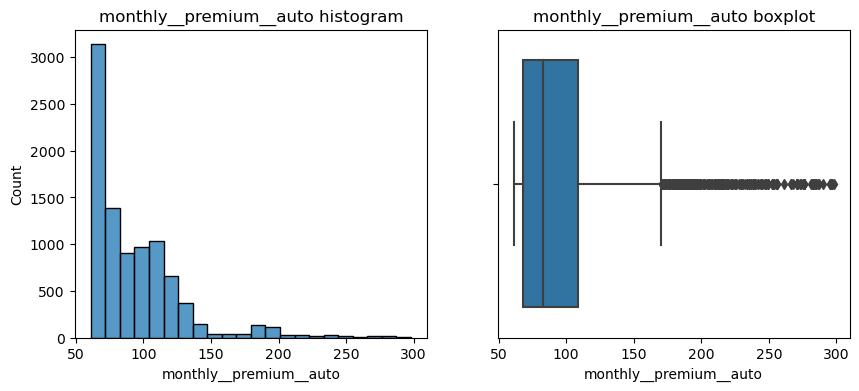

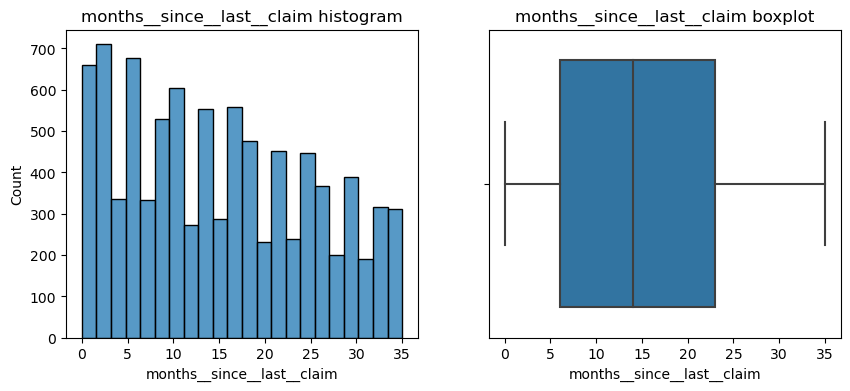

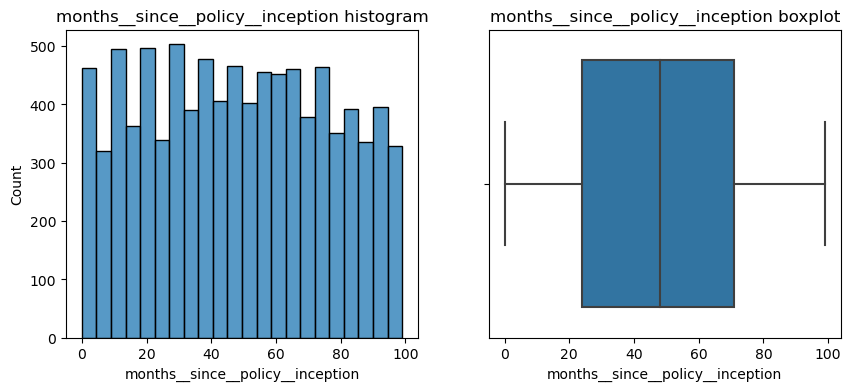

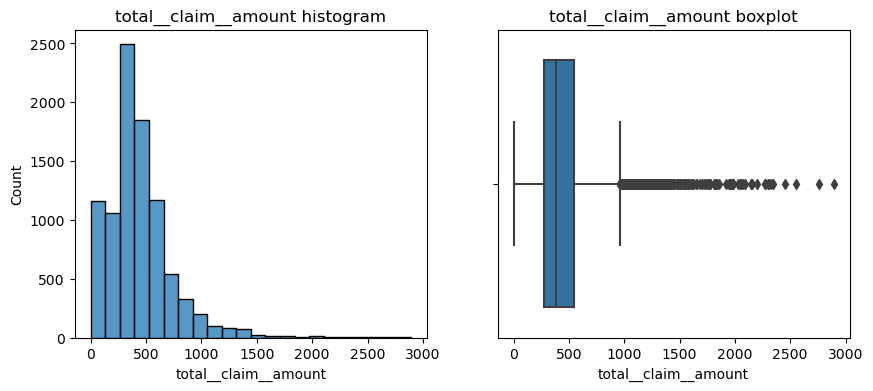

In [120]:
def plot_continuous_variables(df):
    for var in continuous_df:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
            sns.histplot(df[var], bins=22, ax=ax1)
            ax1.set_title(f"{var} histogram")
            sns.boxplot(df[var], ax=ax2)
            ax2.set_title(f"{var} boxplot")
            plt.show()
plot_continuous_variables(continuous_df)

***
#### 10. Comment what you can see in the plots.

> I see 3 columns with a lot of ouliers

***
#### 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

> i did the box plot on top 

***
#### 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.

> I checked with the code under but i realised that if i filtered the values i would remove more than 1000 lines, so I will keep the outliers

***
#### 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [123]:
(customer_df.isna().sum()/len(customer_df)).sort_values(ascending=False)

customer                            0.0
state                               0.0
vehicle__class                      0.0
total__claim__amount                0.0
sales__channel                      0.0
renew__offer__type                  0.0
policy                              0.0
policy__type                        0.0
number_of__policies                 0.0
number_of__open__complaints         0.0
months__since__policy__inception    0.0
months__since__last__claim          0.0
monthly__premium__auto              0.0
marital__status                     0.0
location__code                      0.0
income                              0.0
gender                              0.0
employment_status                   0.0
effective__to__date                 0.0
education                           0.0
coverage                            0.0
response                            0.0
customer__lifetime__value           0.0
vehicle__size                       0.0
dtype: float64

***
#### 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [128]:
numerical_df.to_csv('numerical.csv')